# Montu Python 
## Astronomical ephemerides for the Ancient World
## Example: Compute *Montunctions*


## Goals of this notebook

The goal of this notebook is to determine the stable positions of mars across ancient Egypt history and check when this *marsticies* happened close to the winter solstice and in the Taurus constellation.

## Loading tools

We need to load the packages and the required data for it (star database, planet position database, etc.):

In [1]:
# Montu packages and data
import montu
from montu import D2H, PRINTDF, TABLEDF, DEG, RAD

# Other libraries required
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np

# Load allstars
allstars = montu.Stars()

# These magic commands are intended to allow updating the packages if they change
%load_ext autoreload
%autoreload 2

## *Marstices*

Lets set observing conditions and initial time of exploration:

In [2]:
Tebas = montu.Observer(lon=33,lat=24,height=0)

Our target body:

In [3]:
mars = montu.Planet('Mars')

Now let's predict all the Marstices in the century from -1400 to -1500:

In [4]:
marstices = pd.DataFrame()
i = 0

# Range of years
initial_year = -2000
final_year = -500

mars.reset_store()
mtime = montu.Time(f'{initial_year}-01-01 00:00:00.00',scale='utc',calendar='proleptic')

marstices = []
for _ in montu.WHILE_TRUE():
    jed1,jed2 = mars.next_planesticies(mtime)
    mtime1 = montu.Time(jed1,format='jd',full=True)
    mtime2 = montu.Time(jed2,format='jd',full=True)
    
    # Stopping condition
    if mtime2.readable.year > final_year:
        break
    
    marstices += [pd.DataFrame(dict(
        datepro = [mtime1.readable.datepro,mtime2.readable.datepro],
        datemix = [mtime1.readable.datemix,mtime2.readable.datemix],
        type = ['first','second'],
        jed = [mtime1.jed,mtime2.jed],
    ))]

    mtime = mtime + 2*montu.YEAR
    i += 1

marstices = pd.concat(marstices)
marstices.drop_duplicates(inplace=True)
marstices.reset_index(drop=True,inplace=True)

0it [00:00, ?it/s]

750it [00:00, 980.28it/s] 


In [5]:
marstices

,datepro,datemix,type,jed
0,-2001-09-21 12:52:37.2000,-2001-10-08 12:52:52,first,9.904730e+05
1,-2001-12-09 02:02:01.4000,-2001-12-26 02:02:02,second,9.905516e+05
2,-1999-10-25 10:48:04.2000,-1999-11-11 10:48:48,first,9.912380e+05
3,-1998-01-14 00:58:12.6000,-1998-01-31 00:58:58,second,9.913185e+05
4,-1997-11-30 04:28:27.7000,-1997-12-17 04:28:28,first,9.920037e+05
...,...,...,...,...
1401,-0506-09-04 21:49:24.5000,-506-09-10 21:49:49,second,1.536494e+06
1402,-0504-08-30 13:09:38.6000,-504-09-05 13:09:09,first,1.537220e+06
1403,-0504-11-10 12:33:59.5000,-504-11-16 12:33:33,second,1.537292e+06
1404,-0502-10-10 16:51:06.0000,-502-10-16 16:51:51,first,1.537991e+06


Now we want to add to this information other relevant astronomical information:

1. Position of mars in the sky
2. Date of occurrence of winter solstices
3. Angular distance of Mars to Aldebaran

Position of Mars in the sky:

In [6]:
mars.reset_store()
for index in montu.PROGRESS(marstices.index):
    marstice = marstices.loc[index]

    # Get MonTime object
    mtime = montu.Time(marstice.jed,format='jd')

    # Calculate Mars position and store it
    mars.conditions_in_sky(mtime,Tebas,store=1)
mars.tabulate_store()

  0%|          | 0/1406 [00:00<?, ?it/s]

100%|██████████| 1406/1406 [00:01<00:00, 841.88it/s]


In [7]:
mars.position

,tt,jed,Name,RAJ2000,DecJ2000,RAEpoch,DecEpoch,RAGeo,DecGeo,el,az
0,-126236570942,9.904730e+05,Mars,7.026757,23.322960,3.073795,17.836212,3.073797,17.838371,-48.159613,359.135417
1,-126229784378,9.905516e+05,Mars,5.632474,26.221096,1.774031,13.756077,1.774203,13.757510,-15.035019,292.899084
2,-126170482464,9.912380e+05,Mars,9.479705,17.711436,5.517021,26.057501,5.517134,26.059545,-29.869770,324.116464
3,-126163519480,9.913185e+05,Mars,8.165966,24.253872,4.077912,24.892369,4.078105,24.893611,2.560390,296.310081
4,-126104322889,9.920037e+05,Mars,11.642726,6.391030,8.006254,24.704358,8.006401,24.704688,46.465886,281.282326
...,...,...,...,...,...,...,...,...,...,...,...
1401,-79060353742,1.536494e+06,Mars,23.006199,-11.674151,20.715271,-23.418157,20.715457,-23.414697,32.736253,216.581241
1402,-78997658558,1.537220e+06,Mars,3.772105,17.271194,1.514450,6.586747,1.514421,6.588904,-58.778088,12.376669
1403,-78991439897,1.537292e+06,Mars,2.614838,15.741818,0.423314,2.972830,0.423091,2.974326,-2.157872,85.168320
1404,-78931030900,1.537991e+06,Mars,6.919953,23.751538,4.395169,22.487648,4.394980,22.489512,-16.465913,55.376534


Positions are stored in a separate dataframe:

In [8]:
mars_marstices = copy.deepcopy(mars.position)
mars_marstices['Vmag'] = mars.condition.Vmag
mars_marstices

,tt,jed,Name,RAJ2000,DecJ2000,RAEpoch,DecEpoch,RAGeo,DecGeo,el,az,Vmag
0,-126236570942,9.904730e+05,Mars,7.026757,23.322960,3.073795,17.836212,3.073797,17.838371,-48.159613,359.135417,-0.67
1,-126229784378,9.905516e+05,Mars,5.632474,26.221096,1.774031,13.756077,1.774203,13.757510,-15.035019,292.899084,-0.43
2,-126170482464,9.912380e+05,Mars,9.479705,17.711436,5.517021,26.057501,5.517134,26.059545,-29.869770,324.116464,-0.39
3,-126163519480,9.913185e+05,Mars,8.165966,24.253872,4.077912,24.892369,4.078105,24.893611,2.560390,296.310081,-0.35
4,-126104322889,9.920037e+05,Mars,11.642726,6.391030,8.006254,24.704358,8.006401,24.704688,46.465886,281.282326,-0.40
...,...,...,...,...,...,...,...,...,...,...,...,...
1401,-79060353742,1.536494e+06,Mars,23.006199,-11.674151,20.715271,-23.418157,20.715457,-23.414697,32.736253,216.581241,-1.98
1402,-78997658558,1.537220e+06,Mars,3.772105,17.271194,1.514450,6.586747,1.514421,6.588904,-58.778088,12.376669,-1.44
1403,-78991439897,1.537292e+06,Mars,2.614838,15.741818,0.423314,2.972830,0.423091,2.974326,-2.157872,85.168320,-1.02
1404,-78931030900,1.537991e+06,Mars,6.919953,23.751538,4.395169,22.487648,4.394980,22.489512,-16.465913,55.376534,-0.76


Compute the date of the previous and next winter solstice, and the days elapsed to the closest one:

In [9]:
# Loop on marstices
for index in montu.PROGRESS(marstices.index):
    marstice = marstices.loc[index]

    # Get MonTime object
    mtime = montu.Time(marstice.jed,format='jd')

    # Calculate next and previous solstices
    prev_seasons = montu.Sun.previous_seasons(at=mtime)
    next_seasons = montu.Sun.next_seasons(at=mtime)
    
    # Get the closest solstice
    closest_solstice = min(abs(mtime.jed - prev_seasons[3]),
                           abs(mtime.jed - next_seasons[3]))

    # Add winter solstice to DataFrame
    marstices.loc[index,'closest_solstice'] = closest_solstice

marstices
    

  0%|          | 0/1406 [00:00<?, ?it/s]

100%|██████████| 1406/1406 [00:02<00:00, 484.81it/s]


,datepro,datemix,type,jed,closest_solstice
0,-2001-09-21 12:52:37.2000,-2001-10-08 12:52:52,first,9.904730e+05,89.858280
1,-2001-12-09 02:02:01.4000,-2001-12-26 02:02:02,second,9.905516e+05,11.310084
2,-1999-10-25 10:48:04.2000,-1999-11-11 10:48:48,first,9.912380e+05,55.435827
3,-1998-01-14 00:58:12.6000,-1998-01-31 00:58:58,second,9.913185e+05,25.154548
4,-1997-11-30 04:28:27.7000,-1997-12-17 04:28:28,first,9.920037e+05,20.186209
...,...,...,...,...,...
1401,-0506-09-04 21:49:24.5000,-506-09-10 21:49:49,second,1.536494e+06,106.888026
1402,-0504-08-30 13:09:38.6000,-504-09-05 13:09:09,first,1.537220e+06,111.737487
1403,-0504-11-10 12:33:59.5000,-504-11-16 12:33:33,second,1.537292e+06,39.762245
1404,-0502-10-10 16:51:06.0000,-502-10-16 16:51:51,first,1.537991e+06,71.062716


Now we want to compute the angular distance to Aldebaran. For this purpose, we need to get the information about the star from the database:

In [10]:
aldebaran = allstars.get_stars(ProperName='Aldebaran')
aldebaran

1 star(s):
|    |   MN |    HD |   HR |   HIP | Gl        | Name      | OtherDesignations                                                                     | ProperName   | Bayer   | Flamsteed   | Constellation   |   RAJ2000 |   DecJ2000 |   pmRA |   pmDec |   RadVel |   Distance |   Vmag |   Vmag_min |   Vmag_max |   B-V | SpType   |   Luminosity |   XJ2000 |   YJ2000 |   ZJ2000 |   VXJ2000 |   VYJ2000 |   VZJ2000 |   Primary | MultipleID   |   IsMultiple |   IsVariable |
|----|------|-------|------|-------|-----------|-----------|---------------------------------------------------------------------------------------|--------------|---------|-------------|-----------------|-----------|------------|--------|---------|----------|------------|--------|------------|------------|-------|----------|--------------|----------|----------|----------|-----------|-----------|-----------|-----------|--------------|--------------|--------------|
| 14 |   15 | 29139 | 1457 | 21421 | Gl 171.1A | Al

Now we will compute for each marstice, the angular distance to Aldebaran:

In [11]:
# Loop on marstices
for index in montu.PROGRESS(marstices.index):

    # Get marstice information and location of mars
    marstice = marstices.loc[index]
    mars_location = mars_marstices.loc[index]

    # Propagate aldebaran to epoch
    mtime = montu.Time(marstice.jed,format='jd')
    aldebaran.where_in_space(at=mtime,inplace=True)

    # Compute angular distance
    aldebaran_angdist = montu.Util.haversine_distance(
        mars_location.DecJ2000*DEG,15*mars_location.RAJ2000*DEG,
        float(aldebaran.data.DecJ2000t)*DEG,15*float(aldebaran.data.RAJ2000t)*DEG
    )*RAD    
    
    # uncomment to check
    """
    print(marstice.jed,marstice.datemix)
    print(D2H(mars_location.DecJ2000),D2H(mars_location.RAJ2000))
    print(D2H(aldebaran.data.DecJ2000t),D2H(float(aldebaran.data.RAJ2000t)))
    print(D2H(aldebaran_angdist))
    break
    #"""

    # Angular distance
    marstices.loc[index,'aldebaran_angdist'] = aldebaran_angdist

marstices

  0%|          | 0/1406 [00:00<?, ?it/s]

100%|██████████| 1406/1406 [00:03<00:00, 374.81it/s]


,datepro,datemix,type,jed,closest_solstice,aldebaran_angdist
0,-2001-09-21 12:52:37.2000,-2001-10-08 12:52:52,first,9.904730e+05,89.858280,34.820239
1,-2001-12-09 02:02:01.4000,-2001-12-26 02:02:02,second,9.905516e+05,11.310084,17.306733
2,-1999-10-25 10:48:04.2000,-1999-11-11 10:48:48,first,9.912380e+05,55.435827,69.517868
3,-1998-01-14 00:58:12.6000,-1998-01-31 00:58:58,second,9.913185e+05,25.154548,50.461178
4,-1997-11-30 04:28:27.7000,-1997-12-17 04:28:28,first,9.920037e+05,20.186209,103.062474
...,...,...,...,...,...,...
1401,-0506-09-04 21:49:24.5000,-506-09-10 21:49:49,second,1.536494e+06,106.888026,87.553815
1402,-0504-08-30 13:09:38.6000,-504-09-05 13:09:09,first,1.537220e+06,111.737487,11.832605
1403,-0504-11-10 12:33:59.5000,-504-11-16 12:33:33,second,1.537292e+06,39.762245,28.523663
1404,-0502-10-10 16:51:06.0000,-502-10-16 16:51:51,first,1.537991e+06,71.062716,33.393108


Now we will mark the marstices according to closest solstice and aldebaran angular distance:

In [12]:
max_days_to_solstice = 15 # days
max_aldebaran_angdist = 15 # degrees

marstices['close_solstice'] = False
marstices['close_aldebaran'] = False
marstices['montunctions'] = False

cond_solstices = (marstices['closest_solstice']<=max_days_to_solstice)
marstices.loc[cond_solstices,'close_solstice'] = True
print("Number of marstices close to solstices: ",cond_solstices.sum())

cond_aldebaran = (marstices['aldebaran_angdist']<=max_aldebaran_angdist)
marstices.loc[cond_aldebaran,'close_aldebaran'] = True
print("Number of marstices close to Aldebaran: ",cond_aldebaran.sum())

cond_montunctions = (cond_solstices) & (cond_aldebaran)
marstices.loc[cond_montunctions,'montunctions'] = True
print("Number of Montunctions: ",cond_montunctions.sum())

Number of marstices close to solstices:  146
Number of marstices close to Aldebaran:  121
Number of Montunctions:  24


These are the dates:

In [13]:
montunctions = marstices.loc[marstices.montunctions]
montunctions

,datepro,datemix,type,jed,closest_solstice,aldebaran_angdist,close_solstice,close_aldebaran,montunctions
119,-1875-12-05 17:02:31.2000,-1875-12-21 17:02:02,second,1.036569e+06,14.316840,13.557420,True,True,True
311,-1670-12-06 11:15:36.6000,-1670-12-20 11:15:15,second,1.111444e+06,14.381989,11.532465,True,True,True
385,-1591-12-08 17:38:14.1000,-1591-12-22 17:38:38,second,1.140301e+06,11.333301,13.071666,True,True,True
459,-1512-12-10 23:40:17.3000,-1512-12-24 23:40:40,second,1.169158e+06,8.282254,14.651087,True,True,True
503,-1465-12-06 03:30:47.8000,-1465-12-19 03:30:30,second,1.186319e+06,14.549713,9.723496,True,True,True
577,-1386-12-09 10:46:27.8000,-1386-12-21 10:46:46,second,1.215176e+06,11.447907,11.076110,True,True,True
651,-1307-12-11 17:38:51.3000,-1307-12-23 17:38:38,second,1.244033e+06,8.362725,12.570366,True,True,True
695,-1260-12-05 17:34:40.4000,-1260-12-16 17:34:34,second,1.261193e+06,14.793688,8.309543,True,True,True
725,-1228-12-15 00:09:03.5000,-1228-12-26 00:09:09,second,1.272891e+06,5.294901,14.129529,True,True,True
769,-1181-12-09 01:49:11.4000,-1181-12-20 01:49:49,second,1.290051e+06,11.655913,9.342341,True,True,True


## Periodicity of marstices and montunctions

Now we want to calculate the periodicities of Marstices and Montunctions by calculating the difference in time between consecutive phenomena.

### Setting parameters for winter marstices, aldebaran conjunctions and montunctions

In [14]:
max_days_to_solstice = 15 # days
max_aldebaran_angdist = 15 # degrees

marstices['close_solstice'] = False
marstices['close_aldebaran'] = False
marstices['montunctions'] = False

cond_solstices = (marstices['closest_solstice']<=max_days_to_solstice)
marstices.loc[cond_solstices,'close_solstice'] = True
print("Number of marstices close to solstices: ",cond_solstices.sum())

cond_aldebaran = (marstices['aldebaran_angdist']<=max_aldebaran_angdist)
marstices.loc[cond_aldebaran,'close_aldebaran'] = True
print("Number of marstices close to Aldebaran: ",cond_aldebaran.sum())

cond_montunctions = (cond_solstices) & (cond_aldebaran)
marstices.loc[cond_montunctions,'montunctions'] = True
print("Number of Montunctions: ",cond_montunctions.sum())

montunctions = marstices.loc[marstices.montunctions]

Number of marstices close to solstices:  146
Number of marstices close to Aldebaran:  121
Number of Montunctions:  24


### Periodicity of marstices

In [15]:
times = marstices.jed.to_numpy()
delta1 = times[2::2]-times[:-2:2]
delta2 = times[1::2]-times[:-1:2]

Histogram of times:

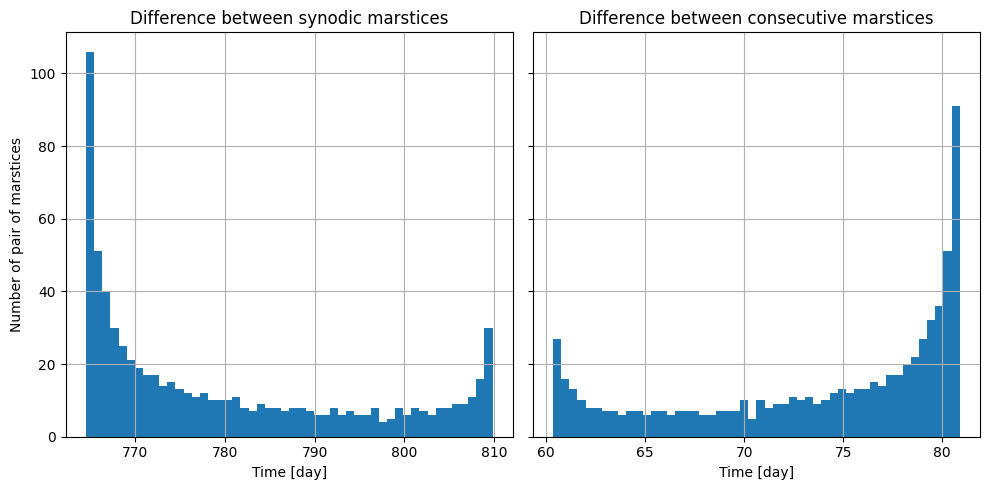

In [16]:
fig,axs = plt.subplots(1,2,figsize=(10,5),sharey=True)

ax = axs[0]
hs1 = ax.hist(delta1,bins=50)
ax.set_xlabel("Time [day]")
ax.set_ylabel("Number of pair of marstices")
ax.set_title("Difference between synodic marstices")
ax.grid()

ax = axs[1]
hs2 = ax.hist(delta2,bins=50)
ax.set_title("Difference between consecutive marstices")
ax.set_xlabel("Time [day]")
ax.grid()

fig.tight_layout()

In [17]:
print(f"Periodicity of synodic marstices: {hs1[1][0]:.1f} - {hs1[1][-1]:.1f}")
print(f"Periodicity of consecutive marstices: {hs2[1][0]:.1f} - {hs2[1][-1]:.1f}")


Periodicity of synodic marstices: 764.5 - 809.9
Periodicity of consecutive marstices: 60.3 - 80.9


### Periodicity of winter marstices

Let's extract the winter marstices:

In [18]:
winter_marstices = marstices[marstices.close_solstice]

Let's get the periodicity:

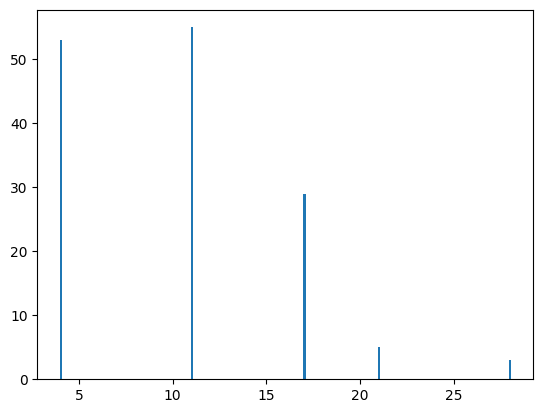

In [19]:
times = winter_marstices.jed.to_numpy()
delta = (times[1:]-times[:-1])*montu.DAY/montu.YEAR
hs = plt.hist(delta,bins=200)


Get the periodicities:

In [20]:
# Times
ts = (hs[1][1:]+hs[1][:-1])/2
# Frequencies
fs = hs[0]
# Times with a positive frequency
cond = fs>0
isort = fs[cond].argsort()[::-1]
Ps = ts[cond][isort]
print("Periods of winter marstices [years]: ", Ps)

Periods of winter marstices [years]:  [11.0162576   4.03507962 17.03451448 21.00656402 27.98774199]


### Periodicity of Aldebaran conjunctions

Let's extract the Aldebaran conjunctions:

In [21]:
aldebaran_marstices = marstices[marstices.close_aldebaran]
len(aldebaran_marstices)

121

Let's get the periodicity:

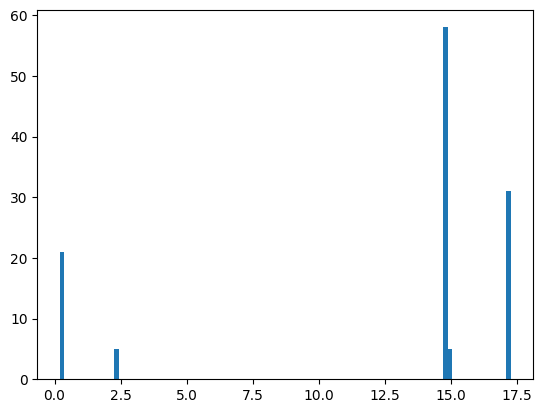

In [22]:
times = aldebaran_marstices.jed.to_numpy()
delta = (times[1:]-times[:-1])*montu.DAY/montu.YEAR
hs = plt.hist(delta,bins=100)


Get the periodicities:

In [23]:
# Times
ts = (hs[1][1:]+hs[1][:-1])/2
# Frequencies
fs = hs[0]
# Times with a positive frequency
cond = fs>0
isort = fs[cond].argsort()[::-1]
Ps = ts[cond][isort]
print("Periods of winter marstices [years]: ", Ps)

Periods of winter marstices [years]:  [14.80330875 17.19389575  0.28903055 14.97406496  2.33810512]


### Periodicity of Montunctions

Let's extract the Aldebaran conjunctions:

In [24]:
len(montunctions)

24

Let's get the periodicity:

Text(0, 0.5, 'Number of Montunctions')

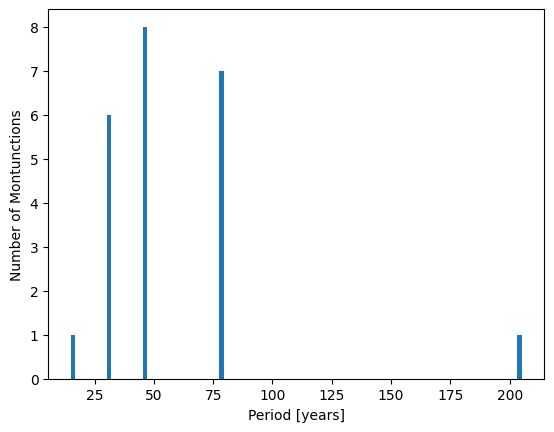

In [25]:
times = montunctions.jed.to_numpy()
delta = (times[1:]-times[:-1])*montu.DAY/montu.YEAR
hs = plt.hist(delta,bins=100)
plt.xlabel("Period [years]")
plt.ylabel("Number of Montunctions")

Get the periodicities:

In [26]:
# Times
ts = (hs[1][1:]+hs[1][:-1])/2
# Frequencies
fs = hs[0]
# Times with a positive frequency
cond = fs>0
isort = fs[cond].argsort()[::-1]
Ps = ts[cond][isort]
print("Periods of Montunctions [years]: ", Ps)

Periods of Montunctions [years]:  [ 46.31123293  78.61829458  31.1079098  204.04571042  15.90458667]


## Lines chart of marstices and montunctions

In [27]:
# Selection of marstices
selection = marstices.loc[:]
nmarstices = len(selection)

jed_min = (1-1e-3)*selection.jed.min()
jed_max = (1+1e-3)*selection.jed.max()

# Number of panels
npanels = 6
delta_jed = (jed_max - jed_min)/npanels

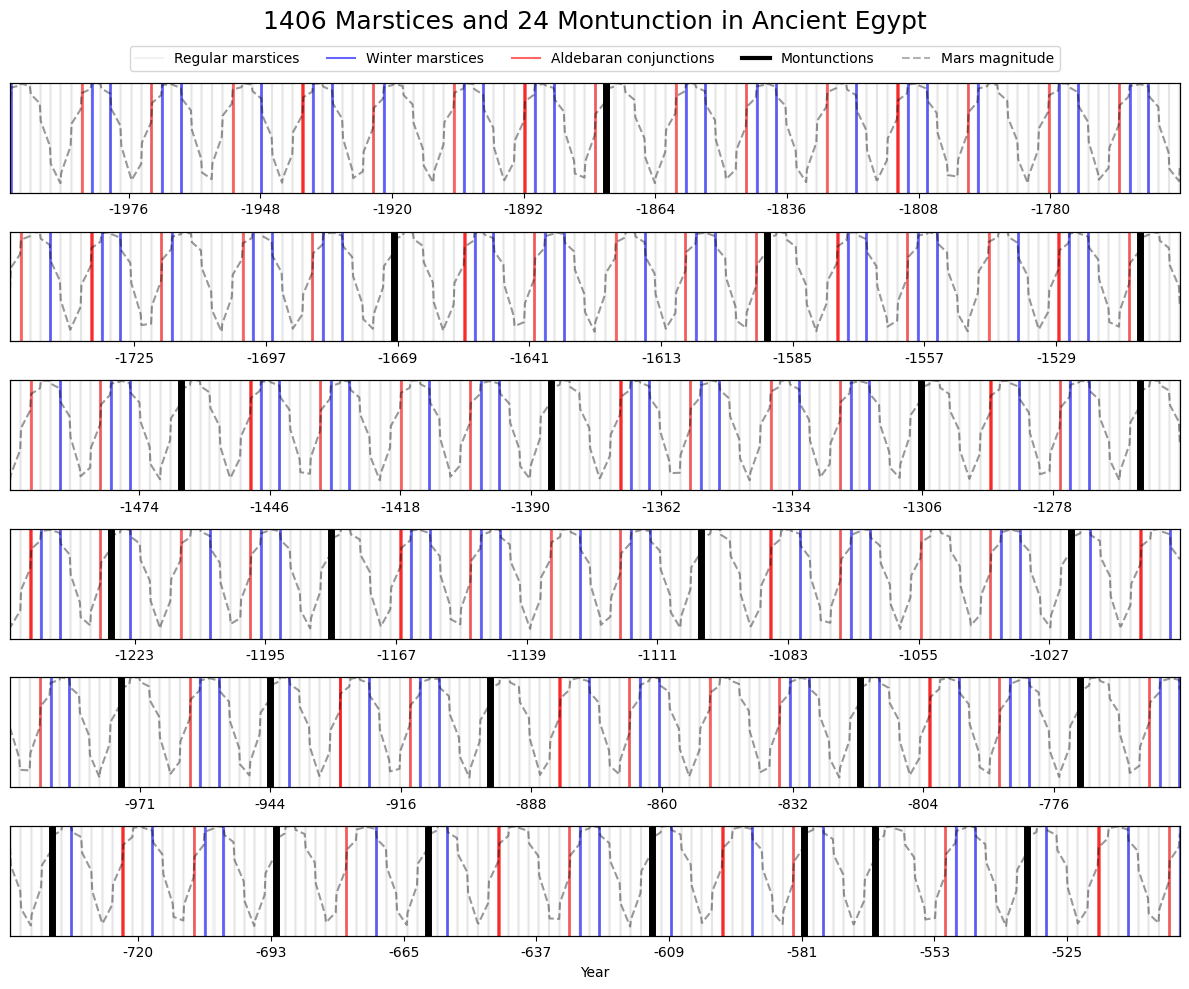

In [28]:
fig,axs = plt.subplots(npanels,1,figsize=(12,10))

axts = []
for ax in axs:
    axts += [ax.twinx()]

alpha_marst = 0.05
alpha_wmarst = 0.6
alpha_aldeb = 0.6
alpha_montu = 1
alpha_mag = 0.3

# Loop on marstices
for index in selection.index:

    # Get marstice information and location of mars
    marstice = selection.loc[index]
    mars_location = mars_marstices.loc[index]

    # Get MonTime object
    mtime = montu.Time(marstice.jed,format='jd')

    # Get panel
    i = int(np.floor((mtime.jed - jed_min)/delta_jed))
    
    # Plot line for marstices
    axs[i].axvline(mtime.jed,color='k',alpha=alpha_marst)

    # Plot line for winter marstices
    if marstice.close_solstice:
        axs[i].axvline(mtime.jed,color='b',lw=2,alpha=alpha_wmarst)

    # Plot line for aldebaran conjunctions
    if marstice.close_aldebaran:
        axs[i].axvline(mtime.jed,color='r',lw=2,alpha=alpha_aldeb)

    # Plot line for montunctions
    if marstice.close_solstice and marstice.close_aldebaran:
        axs[i].axvline(mtime.jed,color='k',lw=5,alpha=alpha_montu)

# Plot distance
for i,axt in enumerate(axts):
    jed_ax_min = jed_min + i*delta_jed
    jed_ax_max = jed_ax_min + delta_jed
    cond = (marstices.jed>=jed_ax_min)&(marstices.jed<=jed_ax_max)
    #axt.plot(marstices[cond].jed,mars.df[cond].site_distance,'k',alpha=0.4)
    axt.plot(marstices[cond].jed,mars_marstices[cond].Vmag,'k--',alpha=0.4)
    
# Decoration
for i,ax in enumerate(axs):
    ax.margins(0)
    ax.get_yaxis().set_visible(False)
    jed_ax_min = jed_min + i*delta_jed
    jed_ax_max = jed_ax_min + delta_jed
    ax.set_xticks(np.linspace(jed_ax_min,jed_ax_max,10))
    
# Change xticks
for ax in axs:
    xticks = ax.get_xticks()
    xtick_labels = []
    for xt in xticks:
        mtime = montu.Time(xt,format='jd',full=True)
        xtick_labels += [f'{mtime.readable.year}']
    ax.set_xticklabels(xtick_labels)

for ax in axts:
    ax.margins(0)
    ax.set_yticks(np.arange(-2.5,0.0,0.5))
    ax.get_yaxis().set_visible(False)

# Legends 
axs[0].plot([],[],'k-',alpha=alpha_marst,label='Regular marstices')
axs[0].plot([],[],'b-',alpha=alpha_wmarst,label='Winter marstices')
axs[0].plot([],[],'r-',alpha=alpha_aldeb,label='Aldebaran conjunctions')
axs[0].plot([],[],'k-',alpha=alpha_montu,lw=3,label='Montunctions')
axs[0].plot([],[],'k--',alpha=alpha_mag,label='Mars magnitude')
axs[0].legend(bbox_to_anchor=(0.5,1.4),ncol=5,loc='upper center')

# Other decoration
axs[-1].set_xlabel('Year')

axs[0].text(0.5,1.5,f"{len(marstices)} Marstices and {len(montunctions)} Montunction in Ancient Egypt",
            transform=axs[0].transAxes,fontsize=18,ha='center')
            
fig.tight_layout()

Magnitude at Montunctions:

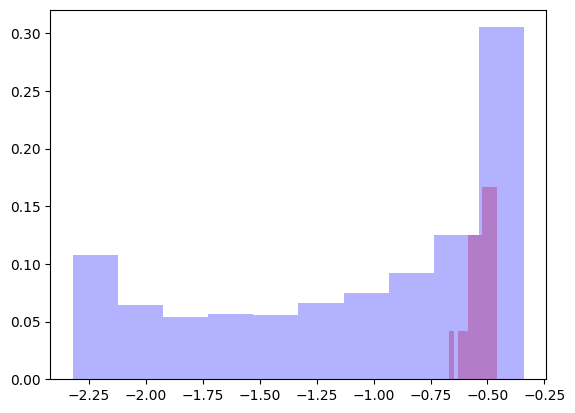

In [29]:
cond = cond_montunctions = (cond_solstices) & (cond_aldebaran)
hs = plt.hist(mars_marstices[cond].Vmag,color='r',alpha=0.3,
              weights=[1/len(mars_marstices[cond])]*len(mars_marstices[cond]))
hs = plt.hist(mars_marstices.Vmag,color='b',alpha=0.3,
              weights=[1/len(mars_marstices)]*len(mars_marstices))

## Montunctions visualization

Let's see one of this *montunctions* in the sky:

In [30]:
# Time of montunction
mtime_montunction = montu.Time(montunctions.iloc[-1].jed,format='jd',full=True)
t = mtime_montunction.tt

mars.reset_store()
for t in np.linspace(-50*montu.DAY,0*montu.DAY,50):
    # Get MonTime object
    mtime = mtime_montunction + t

    # Calculate Mars position and store it
    mars.where_in_sky(mtime,Tebas,store=1)
mars.tabulate_store()

Create a map of montunction:

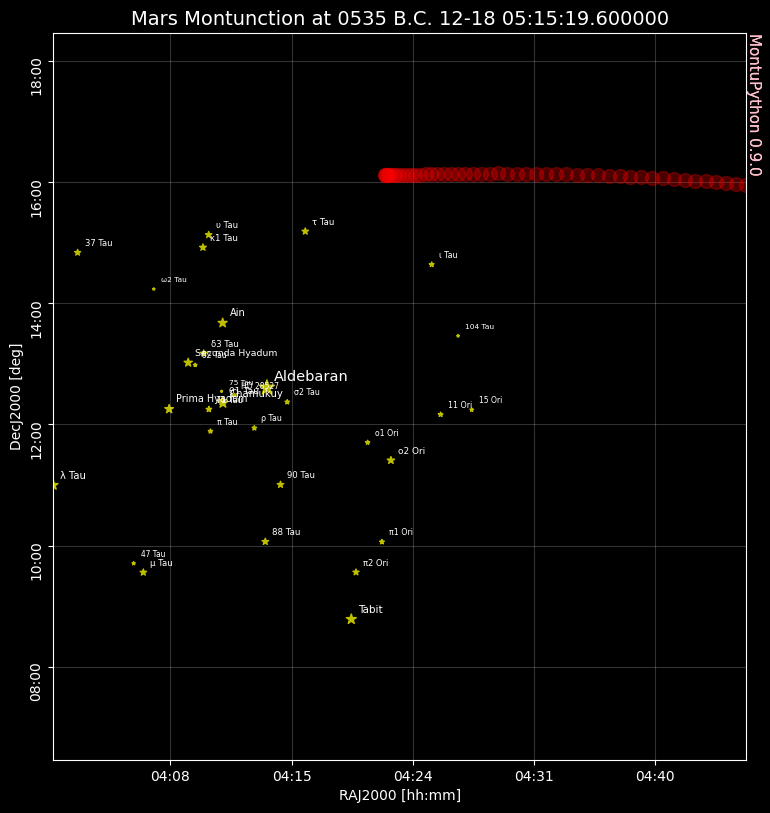

In [31]:
# Plot Hyades
hyades = allstars.get_stars_around(center=[aldebaran.data.RAJ2000,aldebaran.data.DecJ2000],radius=10,Vmag=[-1,5])
fig,ax = hyades.plot_stars(pad=0.0,labels=True,figargs=dict(figsize=(8,8)))

for index in mars.position.index:
    mars_position = mars.position.loc[index]
    ax.plot(15*mars_position.RAJ2000,mars_position.DecJ2000,'ro',ms=10,alpha=0.3)

ax.set_title(f"Mars Montunction at {mtime_montunction.readable.datespice}",fontsize=14)
montu.Util.montu_mark(ax);

## Interesting montunctions

We are interested in the Montunctions happening around the date of birth or dead of Senenmut who, according to several chronologies lived between 1480bce and 1458 bce. Let's select the montunctions in this range:

In [32]:
mtime_start = montu.Time('bce1480-01-01 00:00:00.00')+(-50*montu.YEAR)
mtime_end = montu.Time('bce1480-01-01 00:00:00.00')+50*montu.YEAR

cond = (montunctions.jed>=mtime_start.jed) & (montunctions.jed<=mtime_end.jed)
print("Number of montunctions in the desired interval: ",cond.sum())

montunctions_selected = montunctions.loc[cond]
montunctions_selected

Number of montunctions in the desired interval:  2


,datepro,datemix,type,jed,closest_solstice,aldebaran_angdist,close_solstice,close_aldebaran,montunctions
459,-1512-12-10 23:40:17.3000,-1512-12-24 23:40:40,second,1.169158e+06,8.282254,14.651087,True,True,True
503,-1465-12-06 03:30:47.8000,-1465-12-19 03:30:30,second,1.186319e+06,14.549713,9.723496,True,True,True


Let's see the montunctions:


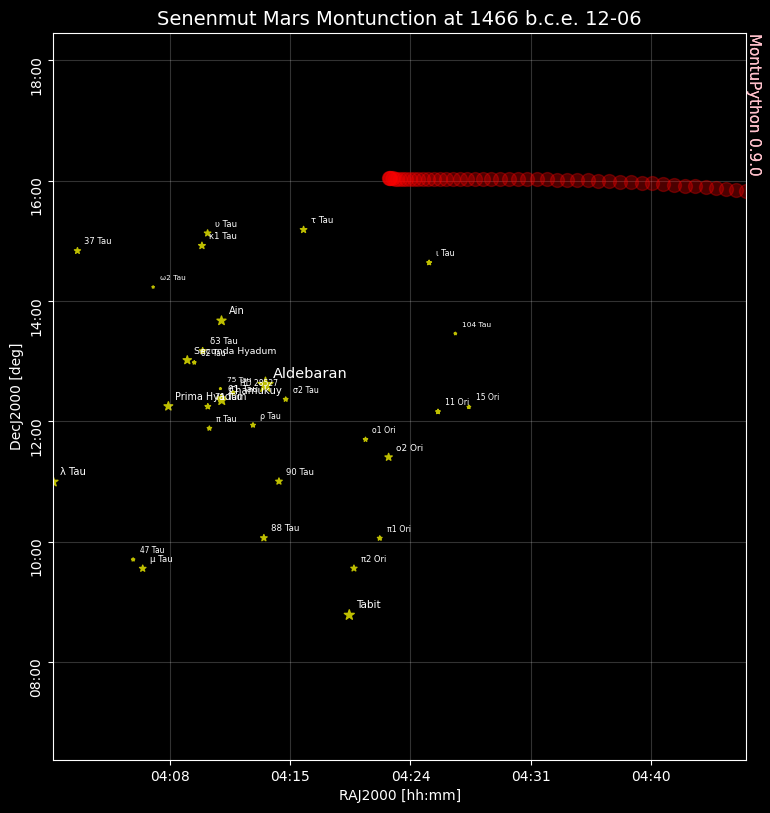

In [33]:
# Time of montunction
isel = 1
mtime_montunction = montu.Time(montunctions_selected.iloc[isel].jed,format='jd',full=True)
t = mtime_montunction.tt

mars.reset_store()
for t in np.linspace(-50*montu.DAY,0*montu.DAY,50):
    # Get MonTime object
    mtime = mtime_montunction + t

    # Calculate Mars position and store it
    mars.where_in_sky(mtime,Tebas,store=1)
mars.tabulate_store()

# Plot Hyades
hyades = allstars.get_stars_around(center=[aldebaran.data.RAJ2000,aldebaran.data.DecJ2000],radius=10,Vmag=[-1,5])
fig,ax = hyades.plot_stars(pad=0.0,labels=True,figargs=dict(figsize=(8,8)))

for index in mars.position.index:
    mars_position = mars.position.loc[index]
    ax.plot(15*mars_position.RAJ2000,mars_position.DecJ2000,'ro',ms=10,alpha=0.3)

ax.set_title(f"Senenmut Mars Montunction at {-mtime_montunction.readable.year+1} b.c.e. {mtime_montunction.readable.month:02d}-{mtime_montunction.readable.day:02d}",fontsize=14)
montu.Util.montu_mark(ax);